<ipython-input-22-1028912491>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("turbo", n_samples)


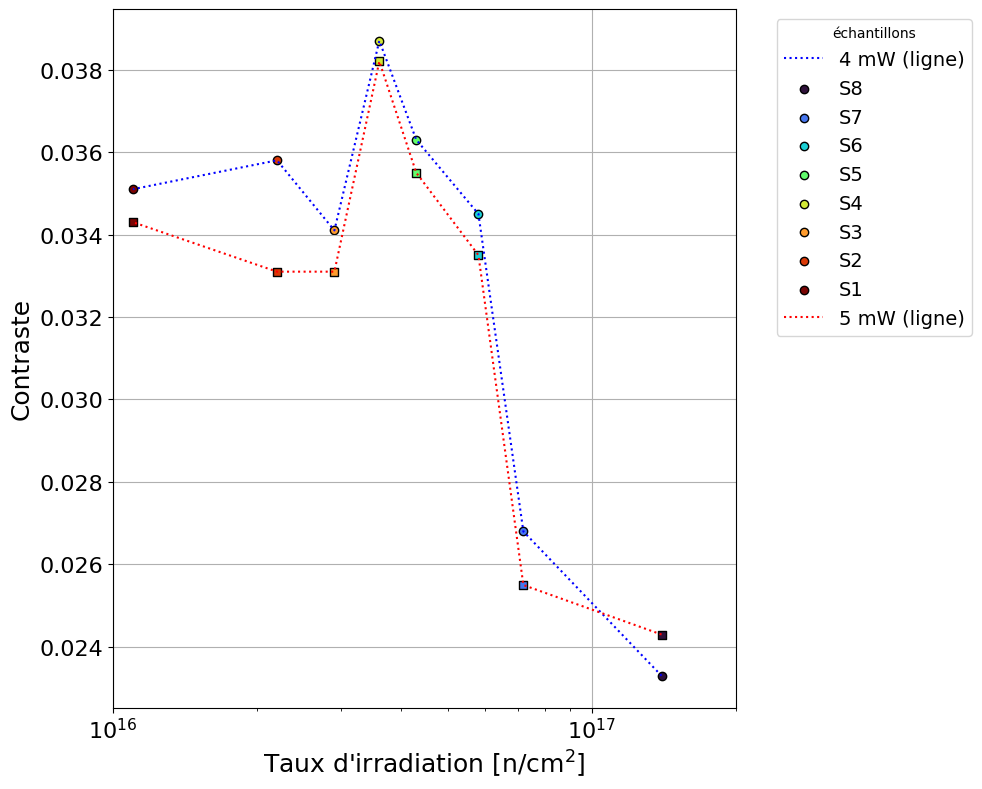

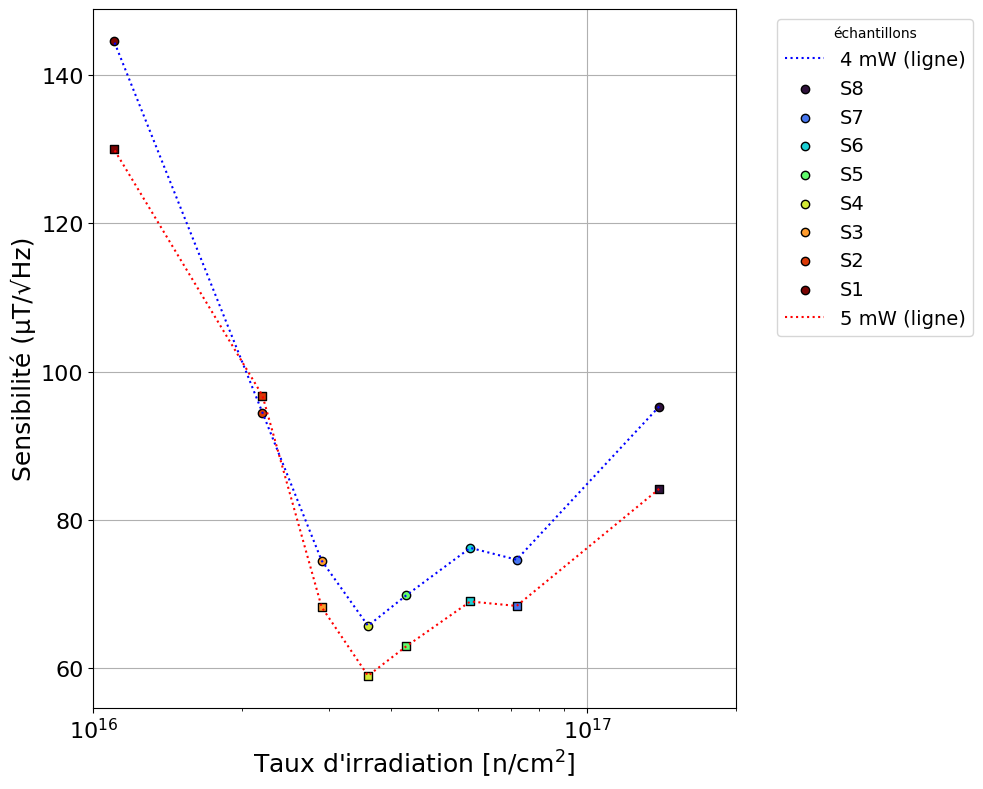

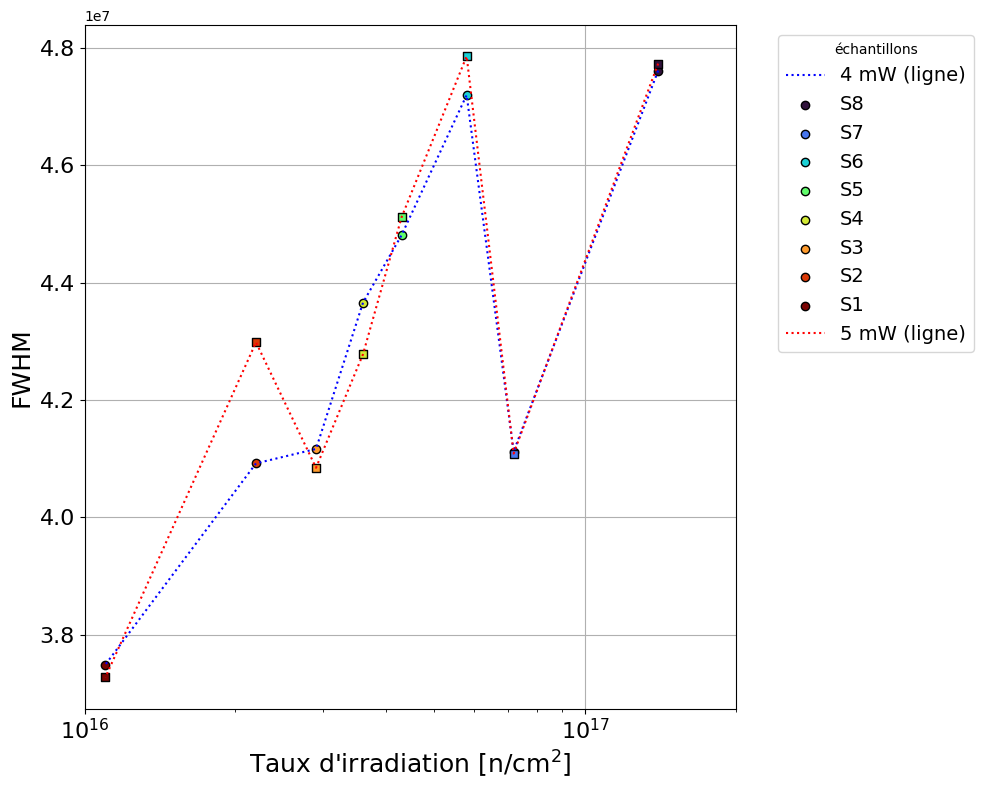

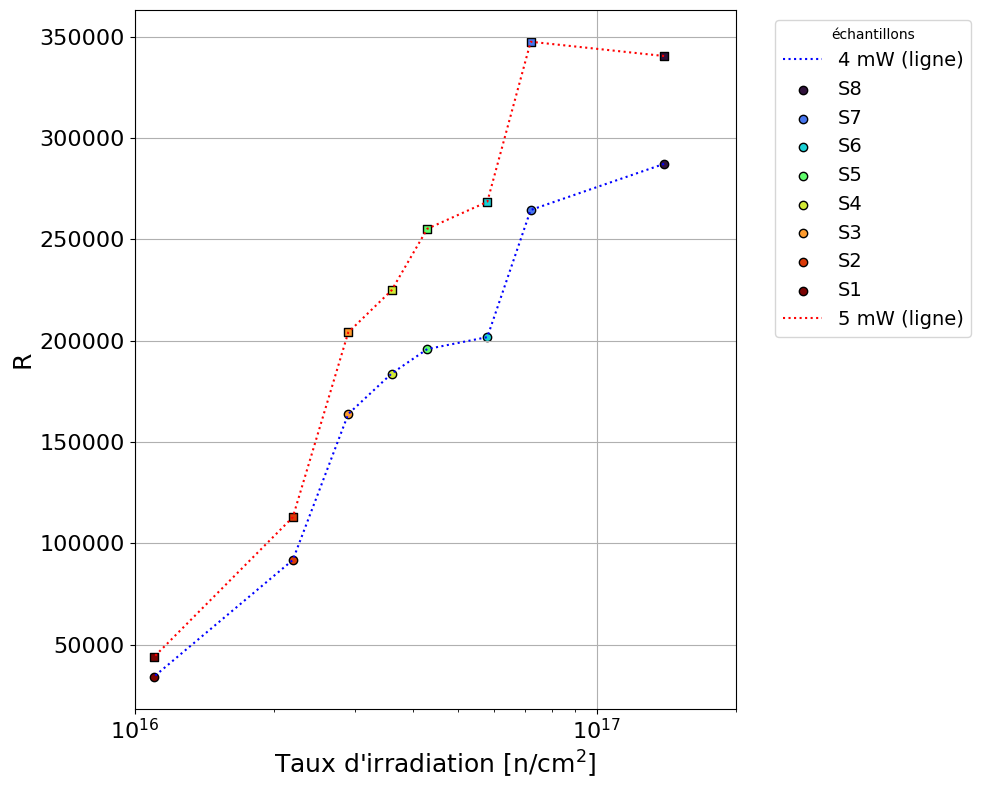

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


fichiers = ["value plot 4mw.ods", "value plot 5mw.ods"]
labels_fichiers = ["4 mW", "5 mW"]
line_colors = ["blue", "red"]
markers = ["o", "s"]


dfs = [pd.read_excel(f).assign(Source=label) for f, label in zip(fichiers, labels_fichiers)]


samples = dfs[0]["Sample"].values
n_samples = len(samples)


cmap = cm.get_cmap("turbo", n_samples)
colors = {sample: cmap(i) for i, sample in enumerate(samples)}

# Variables à tracer
variables = [
    ("C", "Contraste", "C_vs_Thermal_Fluence.png"),
    ("Sensibility( µT / √Hz)", "Sensibilité (µT/√Hz)", "Sensibility_vs_Thermal_Fluence.png"),
    ("fwhm", "FWHM", "FWHM_vs_Thermal_Fluence.png"),("R", "R", "R_vs_Thermal_Fluence.png")
]

for var_col, ylabel, filename in variables:
    plt.figure(figsize=(10, 8))

    for df, label_style, line_color, marker_style in zip(dfs, labels_fichiers, line_colors, markers):

        df_sorted = df.set_index("Sample").loc[samples].reset_index()
        fluences = df_sorted["Thermal fluence"].values
        y_values = df_sorted[var_col].values
        sample_names = df_sorted["Sample"].values

        # Tracer la ligne pointillée
        plt.plot(fluences, y_values, linestyle='dotted', color=line_color, label=f"{label_style} (ligne)")

        # Tracer chaque point avec la couleur liée au sample
        for flu, y, sample in zip(fluences, y_values, sample_names):
            plt.scatter(flu, y, color=colors[sample], edgecolor='black',
                        marker=marker_style, label=sample if label_style == "4 mW" else None)


    plt.xscale('log')
    plt.xlim(1e16, 2e17)
    plt.xlabel("Taux d'irradiation [n/cm$^{2}$]",fontsize = 18)
    plt.ylabel(ylabel,fontsize = 18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.grid(True)

    # Nettoyage des doublons dans la légende
    handles, labels = plt.gca().get_legend_handles_labels()
    seen = set()
    unique_handles_labels = [(h, l) for h, l in zip(handles, labels) if not (l in seen or seen.add(l))]
    handles, labels = zip(*unique_handles_labels)
    plt.legend(handles, labels, title="échantillons", bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=14)

    plt.tight_layout()
    plt.savefig(filename, dpi=300)



